# Dataset Details

### Columns Mapping

InvoiceNo: Unique identifier for each retail invoice or transaction.  
StockCode: Code for the specific product or item being sold.  
Description: Name of the product or item being sold.  
Quantity: Number of units of the product purchased in each transaction.  
InvoiceDate: Date and time of each retail transaction.  
UnitPrice: Price per unit of the product being sold.  
CustomerID: Unique identifier for each customer who made a purchase.  
Country: Name of the country where the customer is located.  

### Quick info
The Data talks about Online Retail business, Our columns in the data are InvoiceNo	StockCode	Description	Quantity	InvoiceDate	UnitPrice	CustomerID	Country
which are explained above

### Our goal is:
-  deep cleaning and analysis to our data and answering related business questions helped by visualizations and drawings.
-  using statistical methods and unsupervised machine learning algorithm to segment customers into clusters, and help the business make business-decisions related to each cluster
-  deploying the model and making an API that can be interacted by the user and segmenting new customers based on different data.

# Importing libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

# Importing Data

In [3]:
data=pd.read_excel("Online Retail.xlsx")
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


# Data Cleaning

In [5]:
data.isnull().sum()
#CustomerID=24% ...Description 0.3%

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [6]:
data.fillna(method='ffill',inplace=True)

C:\Users\Moham\AppData\Local\Temp\ipykernel_18120\286314875.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method='ffill',inplace=True)


In [7]:
num_duplicates = data.duplicated().sum()
print(num_duplicates)

5268


In [8]:
data = data.drop_duplicates()
data.duplicated().sum()

0

In [9]:
delete = ['amazon adjust', 'Discount', 'amazon', '?', 'found', 'counted', 'Given away', 'Dotcom', 'label mix up', 'thrown away'
, 'Adjustment', 'AMAZON FEES', 'wrongly sold as sets', 'Amazon sold sets', 'dotcom sold sets' , 'wrongly sold sets', '? sold as sets?', '?sold as sets?',
'Thrown away', 'damages/display', 'damaged stock', 'broken', 'throw away', 'wrong barcode (22467)', 'wrongly sold (22719) barcode', 'wrong barcode',
'barcode problem', '?lost', "thrown away-can't sell.", "thrown away-can't sell'", 'damages?', 're dotcom quick fix.', 'sold in set?', 'cracked sold as 22467',
'Damaged', 'DAMAGED', 'damaged', 'did  a credit  and did not tick ret', 'adjustment', 'returned', 'wrong code?', 'wrong code', 'crushed',
'damages/showroom etc', 'samples', 'damages/credits from ASOS.', 'damages/dotcom?', 'wet/rusty', 'incorrectly credited C550456 see 47', 'wet damaged',
'missing', 'sold as set on dotcom', 'water damage', 'to push order througha s stock was', 'found some more on shelf', 'Show Samples', 'FOUND', 'mix up with c',
'mouldy, unsaleable.', 'wrongly marked. 23343 in box', 'came coded as 20713', 'alan hodge cant mamage this section', 'dotcom', 'stock creditted wrongly', 'ebay',
'incorrectly put back into stock', 'Damages/samples', 'Crushed', 'taig adjust', 'allocate stock for dotcom orders ta', 'Amazon', 'found box',
'OOPS ! adjustment', 'Found in w/hse', 'website fixed', 'Dagamed', 'wrongly coded', 'stock check', 'crushed boxes', "can't find", 'mouldy', 'Sale error',
'Breakages', 'Marked', 'Damages', 'CHECK', 'Unsaleable, destroyed.', 'marked', 'damages', 'damaged', 'Wrongly', 'wrong', 'wet', 'rusty', 'lost', 'faulty', 'cracked',
'sold as 22467', "Dotcom sold in 6's", 'Missing', 'Adjust bad debt', 'taig adjust no stock', 'WET/MOULDY', 'wrongly coded 20713', 'wrongly coded-23343',
'Marked as 23343', '20713', 'wrongly coded 23343', 'wrongly marked', 'dotcom sales' , 'had been put aside', 'damages wax', 'water damaged',
'Wrongly mrked had 85123a in box', 'wrongly marked carton 22804', 'missing?', 'wet rusty', 'dotcom adjust', 'rusty thrown away', 'rusty throw away', 'check?',
'???lost', 'dotcomstock','?? missing', 'wet pallet', '????missing', '???missing', 'AMAZON','wet?',
'lost??','???', 'wet boxes', '????damages????', 'mixed up', 'lost in space', 'Water damaged', 'smashed', '??', "thrown away-can't sell", 'Thrown away.',
'DOTCOM POSTAGE', 'Dotcom sales', 'Dotcomgiftshop Gift Voucher £40.00', 'Dotcomgiftshop Gift Voucher £30.00', 'Dotcomgiftshop Gift Voucher £20.00'
'Dotcom set', 'Dotcomgiftshop Gift Voucher £50.00', 'Dotcomgiftshop Gift Voucher £10.00', 'sold as set on dotcom and amazon', 'sold as set on dotcom',
'sold as set/6 by dotcom', 'Sold as 1 on dotcom', 'Dotcomgiftshop Gift Voucher £100.00', 'sold with wrong barcode', 're-adjustment',
'Amazon Adjustment','wrongly marked 23343','20713 wrongly marked', 'test','temp adjustment', 'code mix up? 84930', '?display?', 'sold as 1','?missing', 'crushed ctn'
'CRUK Commission', 'amazon sales', 'mouldy, thrown away.', 'AMAZON FEE']

In [10]:
data.drop(data[data['Description'].isin(delete)].index, inplace=True)
data.reset_index(drop=True, inplace=True)

In [11]:
data
#541909 ---> 401604------25% has been filled

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
535238,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
535239,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
535240,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
535241,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


# Converting data and Feature Engineering

In [12]:
#replacing negative values with its abs values
data['Quantity'] = data['Quantity'].abs()

In [13]:
data['InV_Year'] = data.InvoiceDate.dt.year
data['InV_Month'] = data.InvoiceDate.dt.month
data['InV_Day'] = data.InvoiceDate.dt.day
data['WDay'] = data['InvoiceDate'].dt.weekday
weekday_names = {0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday', 4: 'Friday', 5: 'Saturday', 6: 'Sunday'}
data['WeekDay'] = data['WDay'].map(weekday_names)

In [14]:
data['Profit'] = data['Quantity'] * data['UnitPrice']

In [15]:
data.head()
#For visualisation

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InV_Year,InV_Month,InV_Day,WDay,WeekDay,Profit
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010,12,1,2,Wednesday,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,1,2,Wednesday,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010,12,1,2,Wednesday,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,1,2,Wednesday,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,1,2,Wednesday,20.34


In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 535243 entries, 0 to 535242
Data columns (total 14 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    535243 non-null  object        
 1   StockCode    535243 non-null  object        
 2   Description  535243 non-null  object        
 3   Quantity     535243 non-null  int64         
 4   InvoiceDate  535243 non-null  datetime64[ns]
 5   UnitPrice    535243 non-null  float64       
 6   CustomerID   535243 non-null  float64       
 7   Country      535243 non-null  object        
 8   InV_Year     535243 non-null  int32         
 9   InV_Month    535243 non-null  int32         
 10  InV_Day      535243 non-null  int32         
 11  WDay         535243 non-null  int32         
 12  WeekDay      535243 non-null  object        
 13  Profit       535243 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int32(4), int64(1), object(5)
memory usage: 49.0+ 

In [17]:
#country, StockCode is dropped
df=data[['Description', 'Quantity',
       'UnitPrice', 'CustomerID', 'InvoiceDate', 'InvoiceNo', 'Profit']]

**Making Features out of the Data**

In [18]:
#aim is to make it easier for modeling if not needed please delete it..!
df1 =  data.groupby('CustomerID').agg({'InvoiceDate': lambda x: (data['InvoiceDate'].max() - x.max()).days,
                                            'InvoiceNo': 'count',
                                            'Profit': 'sum'})
df1 = df1.rename(columns={'InvoiceDate':'Recency','InvoiceNo':'Frequency','Profit':'Monetary'})
#Recency is diffirence between 1st and last purchase day..
#Monetary is summation of totalprice for one customer..
#Frequency is the count of orders done by the customer..


In [19]:
df_viz =  data.groupby(['CustomerID','Country']).agg({'InvoiceDate': lambda x: (data['InvoiceDate'].max() - x.max()).days,
                                            'InvoiceNo': 'count',
                                            'Profit': 'sum'})
df_viz['Country'] = df_viz.index.get_level_values('Country')
df_viz.index = df_viz.index.get_level_values('CustomerID')
df_viz = df_viz.sort_values('InvoiceNo',ascending=False).rename(columns={"InvoiceDate":"Days since last purchase","InvoiceNo":"Count of Orders","Profit":"Sum of Profit"})

In [20]:
df1.head()

,Recency,Frequency,Monetary
CustomerID,,,
12346.0,325,2,154367.20
12347.0,1,182,4310.00
12348.0,74,205,3150.16
12349.0,18,73,1757.55
12350.0,309,17,334.40


In [21]:
df_viz.head()

,Days since last purchase,Count of Orders,Sum of Profit,Country
CustomerID,,,,
17841.0,1,8459,49248.03,United Kingdom
12748.0,0,5941,55619.79,United Kingdom
14911.0,0,5897,154529.10,EIRE
14096.0,3,5394,63336.12,United Kingdom
14606.0,0,3924,25376.86,United Kingdom


# Outliers Detection and Removal

Recency         Axes(0.125,0.867124;0.0129599x0.0128763)
Frequency    Axes(0.140552,0.867124;0.0129599x0.0128763)
Monetary     Axes(0.156104,0.867124;0.0129599x0.0128763)
dtype: object

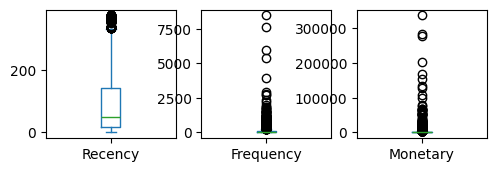

In [22]:
 df1.plot(kind="box", subplots=True, figsize=(100,100), layout=(50,50))

Quantity         Axes(0.125,0.867124;0.0129599x0.0128763)
UnitPrice     Axes(0.140552,0.867124;0.0129599x0.0128763)
CustomerID    Axes(0.156104,0.867124;0.0129599x0.0128763)
Profit        Axes(0.171656,0.867124;0.0129599x0.0128763)
dtype: object

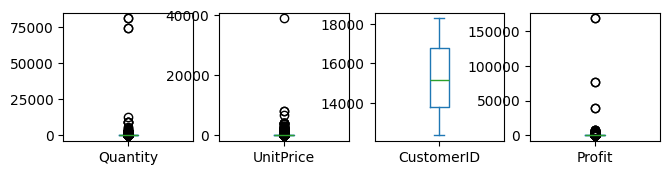

In [23]:
 df.plot(kind="box", subplots=True, figsize=(100,100), layout=(50,50))

In [24]:
for col in (df_viz.select_dtypes(include=np.number)).columns:
    q1 = df_viz[col].quantile(0.25)
    q3 = df_viz[col].quantile(0.75)
    iqr = q3-q1
    upper_limit = q3 + (1.5 * iqr)
    lower_limit = q1 - (1.5 * iqr)
    df_viz=df_viz.loc[(df_viz[col] <= upper_limit) & (df_viz[col] >= lower_limit)]

In [25]:
for col in df1.columns:
    q1 = df1[col].quantile(0.25)
    q3 = df1[col].quantile(0.75)
    iqr = q3-q1
    upper_limit = q3 + (1.5 * iqr)
    lower_limit = q1 - (1.5 * iqr)
    df2=df1.loc[(df1[col] <= upper_limit) & (df1[col] >= lower_limit)]
    print('before removing outliers:', len(df1))
print('after removing outliers:',len(df2))
print('outliers:', len(df1)-len(df2))

before removing outliers: 4372
before removing outliers: 4372
before removing outliers: 4372
after removing outliers: 3916
outliers: 456


In [26]:
df_numerics_only = df.select_dtypes(include=np.number)

for col in df_numerics_only:
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3-q1
    upper_limit = q3 + (1.5 * iqr)
    lower_limit = q1 - (1.5 * iqr)
    df3=df.loc[(df[col] <= upper_limit) & (df[col] >= lower_limit)]
print('before removing outliers:', len(data))
print('after removing outliers:',len(df3))
print('outliers:', len(data)-len(df3))

before removing outliers: 535243
after removing outliers: 492206
outliers: 43037


# Visualization and Business Questions

- What are our 5 most selling products?
- What are our 5 most profitable products?
- Our top 10 Profitable countries? 
- Our top 10 countries with high demands? 
- Top 5 Products with High Demand?
- Top 5 Countries with more customers?
- Top 5 Countries with less customers?
- What is the highest profitable month?
- What is the month with most demands?
- Do Frequent Customers bring much profit?

In [ ]:
df_viz = df_viz.sort_values("Sum of Profit", ascending=False)
df_viz.head()

,Days since last purchase,Count of Orders,Sum of Profit,Country
CustomerID,,,,
16316.0,63,158,3127.36,United Kingdom
14565.0,95,130,3124.47,United Kingdom
13685.0,2,39,3119.44,United Kingdom
16218.0,29,91,3119.44,United Kingdom
13631.0,99,12,3119.07,United Kingdom


In [ ]:
by_profit = data.groupby("Country")["Profit"].sum().reset_index().sort_values('Profit', ascending=False).reset_index(drop=True)
by_orders = data.groupby("Country")["InvoiceNo"].count().reset_index().sort_values('InvoiceNo', ascending=False).reset_index(drop=True).rename(columns={'InvoiceNo':'Count of Orders'})
viz = by_profit.head(11)
viz2 = by_orders.head(11) 
viz_wuk_profit = by_profit.drop(index=0).head(10)
viz_wuk_order = by_orders.drop(index=0).head(10)


In [ ]:
viz3 = data.groupby("Country")['CustomerID'].count().reset_index().sort_values('CustomerID', ascending=False)
viz3 = viz3.rename(columns={'CustomerID':'No. of Customers'}).reset_index(drop=True)
least_customers = viz3.tail(5)
high_customers = viz3.head(5)

In [ ]:
viz4 = data.groupby(['Description','UnitPrice'])['InvoiceNo'].count().reset_index().sort_values('InvoiceNo', ascending=False)
viz4_1 = data.groupby(['Description','UnitPrice'])['Profit'].sum().reset_index().sort_values('Profit', ascending=False)
viz4 = viz4.rename(columns={'InvoiceNo':'Count of Orders'}).reset_index(drop=True)
high_order = viz4.head(6)
high_profit = viz4_1.head(6)

In [ ]:
monthly_profit = data.groupby(['InV_Month', 'InV_Year'])['Profit'].sum().reset_index()
highest_profit_month = monthly_profit.loc[monthly_profit['Profit'].idxmax()]

In [ ]:
monthly_demand = data.groupby(['InV_Month','InV_Year'])['Quantity'].sum().reset_index()
highest_demand_month = monthly_demand.loc[monthly_demand['Quantity'].idxmax()]

In [ ]:
product_quantity_sold = df.groupby('Description')['Quantity'].sum().reset_index()
product_quantity_sold_sorted = product_quantity_sold.sort_values(by='Quantity', ascending=False)
top_5_selling_products = product_quantity_sold_sorted.head(5)

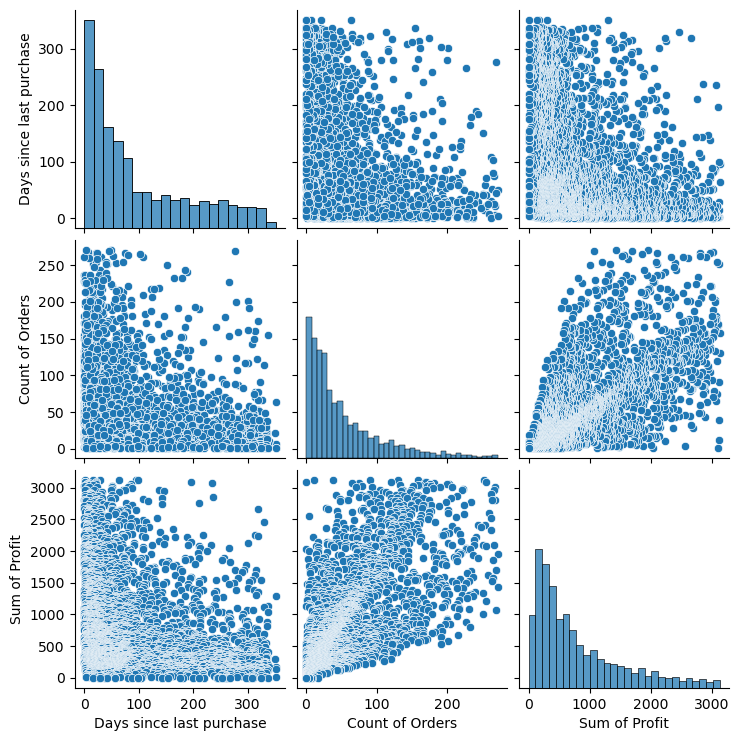

In [ ]:
sns.pairplot(df_viz)

In [ ]:
fig = px.scatter(df_viz, x="Days since last purchase", y="Sum of Profit",
	         size="Count of Orders", color="Country", size_max=60, log_y=True, title="Decoding Online Retail Success: Is it about Recency, Monetary, or Frequency?")
fig.show()
# Model idea introduction

In [ ]:
fig = px.scatter(df_viz, x="Sum of Profit", y="Count of Orders",
	         size="Count of Orders", color="Country", size_max=60, log_y=True, title="Decoding Online Retail Success: Is it about Recency, Monetary, or Frequency?")
fig.show()

In [ ]:
# Top 10 Profitable Countries
fig = px.bar(viz, x='Country', y='Profit', log_y=True, title='Top 10 Profitable Countries')
fig.show()

In [ ]:
# Top 10 Profitable Countries(w/UK)
fig = px.bar(viz_wuk_profit, x='Country', y='Profit', title='Top 10 Profitable Countries (UK excluded)')
fig.show()

In [ ]:
#Top 10 countries with highest demands
fig = px.bar(viz2, x='Country', y="Count of Orders", log_y=True, title='Top 10 Countries with Highest demand')
fig.show()

In [ ]:
# Top 10 Countries with Highest demand(w/UK)
fig = px.bar(viz_wuk_order, x='Country', y='Count of Orders', title='Top 10 Countries with Highest demand (UK excluded)')
fig.show()

In [ ]:
fig = px.bar(least_customers, x='Country', y='No. of Customers', title='Top 5 Countries with Least number of Customers')
fig.show()

In [ ]:
fig = px.bar(high_customers, x='Country', y='No. of Customers', log_y=True, title='Top 5 Countries with highest number of Customers')
fig.show()

In [ ]:
fig = px.bar(high_order, x='Count of Orders', y='Description', title='Top 5 Products with High Demand', orientation='h', hover_data=["UnitPrice"])
fig.show()

In [ ]:
fig = px.bar(top_5_selling_products, x='Quantity', y='Description',title='Top 5 Most Selling Products',orientation='h', hover_data=["Quantity"])
fig.show()

In [ ]:
fig = px.bar(high_profit, x='Profit', y='Description', title='Top 5 Profitable Products', orientation='h', hover_data=["UnitPrice"])
fig.show()

In [ ]:
fig = px.bar(monthly_profit, x='InV_Month', y='Profit', title='Total Profit by month', hover_data=['InV_Year'])
fig.update_traces(marker_line_width=1.5, opacity=0.6)
fig.update_layout(xaxis_title="month", yaxis_title="Total Profit")
fig.show()

In [ ]:
fig = px.bar(monthly_demand, x='InV_Month', y='Quantity', title='Total Demand by Month', hover_data=['InV_Year'])
fig.update_traces(marker_line_width=1.5, opacity=0.6)
fig.update_layout(xaxis_title="Month", yaxis_title="Total Quantity Sold")
fig.show()

# Encoding

In [ ]:
df.head()

,Description,Quantity,UnitPrice,CustomerID,InvoiceDate,InvoiceNo,Profit
0,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55,17850.0,2010-12-01 08:26:00,536365,15.30
1,WHITE METAL LANTERN,6,3.39,17850.0,2010-12-01 08:26:00,536365,20.34
2,CREAM CUPID HEARTS COAT HANGER,8,2.75,17850.0,2010-12-01 08:26:00,536365,22.00
3,KNITTED UNION FLAG HOT WATER BOTTLE,6,3.39,17850.0,2010-12-01 08:26:00,536365,20.34
4,RED WOOLLY HOTTIE WHITE HEART.,6,3.39,17850.0,2010-12-01 08:26:00,536365,20.34


In [ ]:
data['Description'] = data['Description'].astype(str)
le=LabelEncoder()
df['Description']=le.fit_transform(data['Description'])
df.dtypes

C:\Users\COMPUMARTS\AppData\Local\Temp\ipykernel_11144\795603029.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Description             int32
Quantity                int64
UnitPrice             float64
CustomerID            float64
InvoiceDate    datetime64[ns]
InvoiceNo              object
Profit                float64
dtype: object

In [ ]:
#data after encoding
df.head()

,Description,Quantity,UnitPrice,CustomerID,InvoiceDate,InvoiceNo,Profit
0,3867,6,2.55,17850.0,2010-12-01 08:26:00,536365,15.30
1,3875,6,3.39,17850.0,2010-12-01 08:26:00,536365,20.34
2,890,8,2.75,17850.0,2010-12-01 08:26:00,536365,22.00
3,1868,6,3.39,17850.0,2010-12-01 08:26:00,536365,20.34
4,2866,6,3.39,17850.0,2010-12-01 08:26:00,536365,20.34


**Scaling**

In [ ]:
scale = StandardScaler()
df_scaled = scale.fit_transform(df2)
df_scaled = pd.DataFrame(df_scaled, columns=df2.columns)

In [ ]:
df_scaled.head()

,Recency,Frequency,Monetary
0,-0.953117,1.207062,3.204244
1,-0.239903,1.457461,2.074959
2,-0.787026,0.020384,0.719035
3,2.056062,-0.589285,-0.666624
4,1.020435,-0.730816,-0.905560


## Modeling

**Feature Extraction using PCA**

In [ ]:
import matplotlib.pyplot as plt

def pca_plot(cumulative_explained_variance, df):
    """
    Plot the cumulative explained variance to select the number of components.

    Parameters:
    cumulative_explained_variance (array): Cumulative explained variance ratio
    dfk (pandas dataframe): Original data
    """
    plt.figure(figsize=(8, 6))
    plt.plot(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance)
    plt.xlabel('Number of Components')
    plt.ylabel('Cumulative Explained Variance')
    plt.title('PCA Explained Variance')
    plt.show()

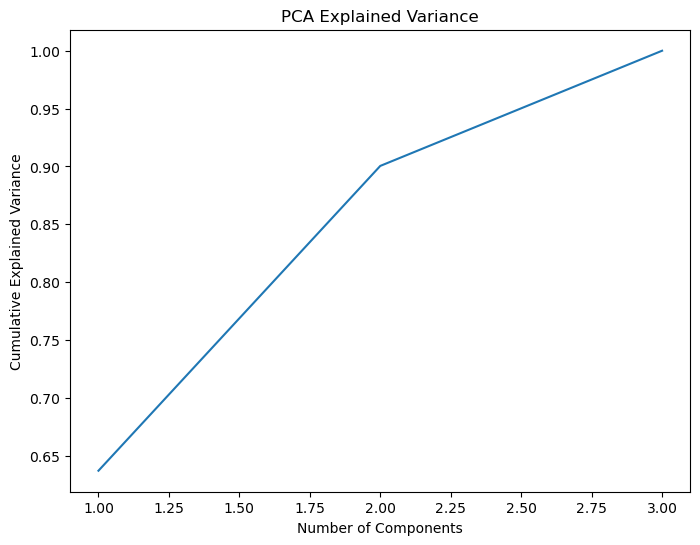

In [ ]:
from sklearn.decomposition import PCA

# Initialize PCA with the number of components equal to the number of scaled features
pca = PCA(n_components=df_scaled.shape[1])

# Fit PCA to the scaled data
pca.fit(df_scaled)

# Calculate the explained variance and cumulative explained variance
explained_variance = pca.explained_variance_ratio_
cumulative_explained_variance = np.cumsum(explained_variance)

# Visualize the explained variance to select the number of components
pca_plot(cumulative_explained_variance, df_scaled)

In [ ]:
pca = PCA(n_components=2)
pca.fit(df_scaled)

PCA(n_components=2)

In [ ]:
scores_pca = pca.transform(df_scaled)

In [ ]:
scores_pca

array([[ 3.23505204,  0.41861456],
       [ 2.35768457,  0.84408075],
       [ 0.81668468, -0.50808885],
       ...,
       [-0.53644328, -1.24218707],
       [ 5.51370557,  1.87489983],
       [ 0.74415144, -0.28773107]])

**Selecting K number of Clusters**

In [ ]:
from sklearn.cluster import KMeans
sum_of_square_distance=[]
for k in range(1,11):
    km=KMeans(n_clusters =k,init="k-means++",max_iter=300, random_state=33)
    km=km.fit(scores_pca)
    sum_of_square_distance.append(km.inertia_)

C:\Users\COMPUMARTS\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

C:\Users\COMPUMARTS\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

C:\Users\COMPUMARTS\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

C:\Users\COMPUMARTS\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

C:\Users\COMPUMARTS\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:



Text(0, 0.5, 'Sum of Squared Distance')

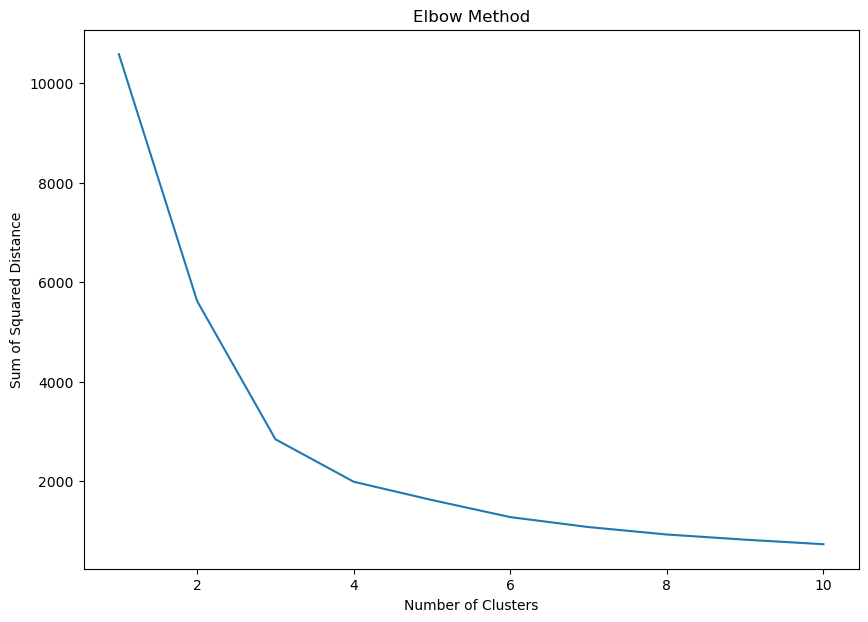

In [ ]:
plt.figure(figsize=(10,7))
plt.plot(range(1,11),sum_of_square_distance)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel("Sum of Squared Distance")

#### From previous graph the expected number of clusters is 3


**Building the ML model using K-means Algorithm**

In [ ]:
Model = KMeans (n_clusters=3,
                init='k-means++',
                max_iter=300)
Model.fit(scores_pca)

C:\Users\COMPUMARTS\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



KMeans(n_clusters=3)

In [ ]:
dfk = df2.copy()
dfk["Cluster"] = Model.labels_

dfk.head()

,Recency,Frequency,Monetary,Cluster
CustomerID,,,,
12347.0,1,182,4310.00,0
12348.0,74,205,3150.16,0
12349.0,18,73,1757.55,1
12350.0,309,17,334.40,2
12353.0,203,4,89.00,2


In [ ]:
df_clustered = dfk.copy() 
df_clustered['CustomerID'] = df_clustered.index.get_level_values('CustomerID')
df_clustered = df_clustered.reset_index(drop=True)

df_clustered.head()

,Recency,Frequency,Monetary,Cluster,CustomerID
0,1,182,4310.00,0,12347.0
1,74,205,3150.16,0,12348.0
2,18,73,1757.55,1,12349.0
3,309,17,334.40,2,12350.0
4,203,4,89.00,2,12353.0


In [ ]:
dfk.groupby('Cluster').agg({
    'Recency':'mean',
    'Frequency':'mean',
    'Monetary':['mean', 'count']}).round(2)

Recency Frequency Monetary      
           mean      mean     mean count
Cluster                                 
0         40.88    217.05  2831.34   681
1         48.30     46.80   738.47  2248
2        252.80     25.85   407.73   987

In [ ]:
from sklearn.metrics import silhouette_score

preds = Model.fit_predict(scores_pca)
silhouette = silhouette_score(scores_pca, preds)
print("Silhouette Coefficient:", silhouette)

C:\Users\COMPUMARTS\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



Silhouette Coefficient: 0.5315584781336815


**Visualizing Clusters**

In [ ]:
import plotly.express as px

# Create a 3D scatter plot matrix with Plotly
fig = px.scatter_3d(dfk, x='Recency', y='Frequency', z='Monetary', color='Cluster')

fig.update_layout(
    scene=dict(
        xaxis_title='Recency',
        yaxis_title='Frequency',
        zaxis_title='Monetary',
    ),
    title='Clustering by Recency, Frequency, and TotalPrice',
    width=800,
    height=600
)

fig.show()

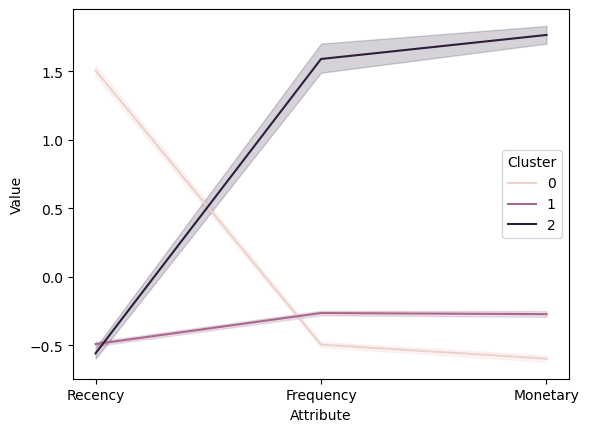

In [ ]:
# Visualising the Cluster Chartecteristics

df_normalized = pd.DataFrame(df_scaled, columns=['Recency', 'Frequency', 'Monetary'])
df_normalized['ID'] = df2.index
df_normalized['Cluster'] = Model.labels_
# Melt The Data
df_nor_melt = pd.melt(df_normalized.reset_index(),
                      id_vars=['ID', 'Cluster'],
                      value_vars=['Recency','Frequency','Monetary'],
                      var_name='Attribute',
                      value_name='Value')
df_nor_melt.head()
# Visualize it
sns.lineplot(x='Attribute', y='Value', hue='Cluster', data=df_nor_melt)
plt.show()

We deduce from the chart that cluster (1) is loyal:
* Monetary value is high --> They tend to ___spend more___
* Frequency is high --> ___More orders___ is placed by them
* Recency attribute is low --> ___less days___ between each purchase which means they bought the products ___more recently___

-they pay more, order more and they bought more recently, which means they are loyal to us and can be a good research data for making potential customers loyal.

We deduce from the chart that cluster (0) is Potential Customer:
* Monetary value is low --> They tend to ___spend less___
* Frequency is low --> ___less orders___ is placed by them
* Recency attribute is low --> ___less days___ between each purchase which means they bought the products ___more recently___

-they pay less, and order less but, they bought more recently which means we can convert them into loyal customers with good marketing and shopping deals.  
-they are also a good research data for attracting customers to our business.

We deduce from the chart that cluster (2) is Churn customers:
* Monetary value is low --> They tend to ___spend less___
* Frequency is low --> ___less orders___ is placed by them
* Recency attribute is high --> ___more days___ between each purchase which means they bought the products ___a while ago___

-they pay less, order less and they are old customers, this cluster can be depercated.